<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-PCVK-2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Lailatul Badriyah

Kelas: TI-3H

Absen: 14

NIM : 2141720036



---



# **Jobsheet 12: Feature Matching, Face Detection, Face Tracking**

In [5]:
from google.colab import drive
drive.mount('/content/drive')
faces_path = '/content/drive/MyDrive/PCVK/week12/Face Detection/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

## **Contoh**

In [7]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [9]:
reeses = cv.imread(f'{faces_path}/reeses_puffs.png',0)
# display(reeses)

In [10]:
cereals = cv.imread(f'{faces_path}/many_cereals.jpg',0)
# display(cereals)

### **ORB (Orient FASE and Rotated BRIEF)**

In [14]:
# Membuat objek detektor ORB
orb = cv.ORB_create()

# Mendeteksi dan menghitung deskriptor untuk gambar pertama (reeses)
kp1, des1 = orb.detectAndCompute(reeses, None)

# Mendeteksi dan menghitung deskriptor untuk gambar kedua (cereals)
kp2, des2 = orb.detectAndCompute(cereals, None)

# Membuat objek matcher Brute-Force dengan jarak Hamming
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Melakukan pencocokan fitur antara deskriptor gambar pertama dan kedua
matches = bf.match(des1, des2)

# Mengambil satu pencocokan (match) dari hasil pencocokan
single_match = matches[0]

# Menampilkan jarak (distance) dari satu pencocokan
single_match.distance

71.0

In [15]:
# Menghitung jumlah total pencocokan fitur yang ditemukan antara gambar pertama dan kedua
len(matches)

139

(-0.5, 1316.5, 559.5, -0.5)

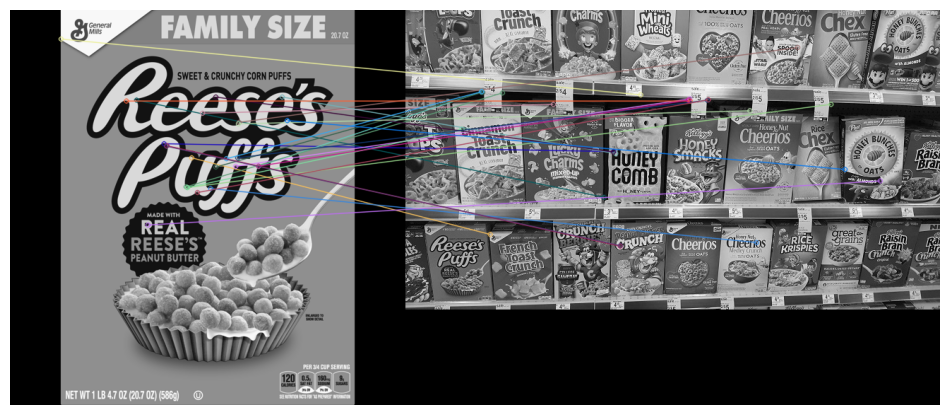

In [16]:
# Mengurutkan hasil pencocokan berdasarkan jarak (distance) secara ascending
matches = sorted(matches, key=lambda x: x.distance)

# Menggambar 25 pencocokan teratas antara gambar pertama (reeses) dan gambar kedua (cereals)
reeses_match = cv.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

# Menampilkan gambar yang telah digambar pencocokan fitur
display(reeses_match)

# Menonaktifkan sumbu (axis) pada plot
plt.axis('off')

### **SIFT (Scale-Invariant Feature Transform)**

In [17]:
# Membuat objek detektor SIFT (Scale-Invariant Feature Transform)
sift = cv.xfeatures2d.SIFT_create()

# Mendeteksi dan menghitung deskriptor untuk gambar pertama (reeses) menggunakan SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)

# Mendeteksi dan menghitung deskriptor untuk gambar kedua (cereals) menggunakan SIFT
kp2, des2 = sift.detectAndCompute(cereals, None)

# Membuat objek matcher Brute-Force
bf = cv.BFMatcher()

# Melakukan pencocokan fitur dengan metode k-NN (k-Nearest Neighbors)
matches = bf.knnMatch(des1, des2, k=2)

# Inisialisasi daftar pencocokan fitur yang dianggap "baik" (good)
good = []

# Memilih pencocokan fitur yang memenuhi kriteria kedekatan jarak
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

# Menghitung jumlah total pencocokan fitur yang dianggap "baik"
len(good)

79

In [18]:
# Menghitung jumlah total pencocokan fitur yang ditemukan antara gambar pertama dan kedua
len(matches)

1501

(-0.5, 1316.5, 559.5, -0.5)

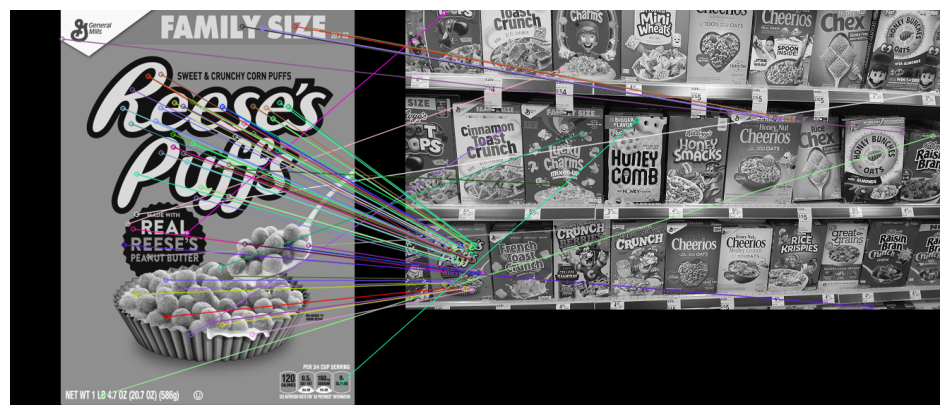

In [19]:
# Menggambar pencocokan fitur yang dianggap "baik" (good) antara gambar pertama (reeses) dan kedua (cereals) menggunakan metode drawMatchesKnn
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

# Menampilkan gambar yang telah digambar pencocokan fitur
display(sift_matches)

# Menonaktifkan sumbu (axis) pada plot
plt.axis('off')

### **Face Detection**

(-0.5, 872.5, 1049.5, -0.5)

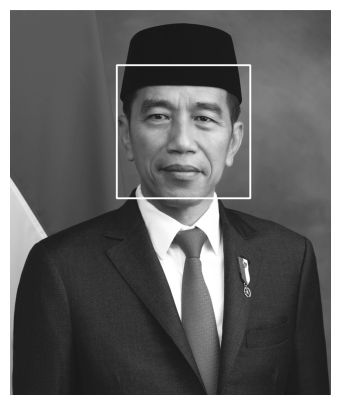

In [20]:
# Membuat objek detektor wajah menggunakan Cascade Classifier dengan model haarcascade_frontalface_alt.xml
cascade_wajah = cv.CascadeClassifier(f'{faces_path}/haarcascade_frontalface_alt.xml')

# Membaca gambar presiden (jokowi) dalam mode grayscale
presiden = cv.imread(f'{faces_path}/jokowi.jpg', 0)

# Membuat salinan gambar presiden
presiden_img = np.copy(presiden)

# Mendeteksi wajah pada gambar presiden menggunakan Cascade Classifier
roi_wajah = cascade_wajah.detectMultiScale(presiden_img)

# Menggambar kotak di sekitar setiap wajah yang terdeteksi
for (x, y, w, h) in roi_wajah:
    cv.rectangle(presiden_img, (x, y), (x+w, y+h), (255, 255, 255), 3)

# Menampilkan gambar presiden yang telah diubah dengan kotak di sekitar wajah
plt.figure(figsize=(5, 5))
plt.imshow(presiden_img, cmap='gray')
plt.axis('off')

## **Praktikum**

**1. Mengimport Library**

In [21]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

**2. Melakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet)**

(<Axes: >,
 (-0.5, 872.5, 1049.5, -0.5))

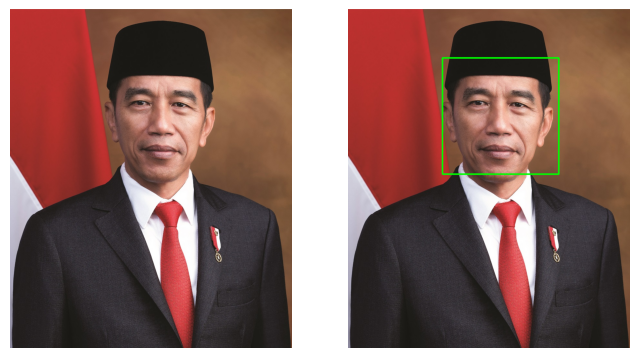

In [72]:
jokowi = cv.imread(f'{faces_path}/jokowi.jpg')
jokowi = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
jokowi_img = np.copy(jokowi)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(jokowi),plt.axis('off')
plt.subplot(122),plt.imshow(jokowi_img),plt.axis('off')

(<Axes: >,
 (-0.5, 533.5, 699.5, -0.5))

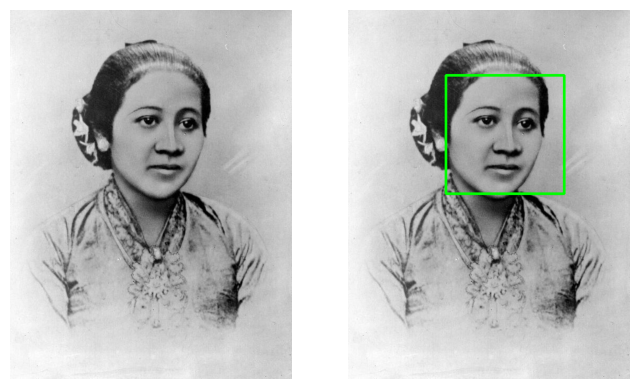

In [73]:
kartini = cv.imread(f'{faces_path}/kartini.jpg')
kartini = cv.cvtColor(kartini, cv.COLOR_BGR2RGB)
kartini_img = np.copy(kartini)

roi_wajah = cascade_wajah.detectMultiScale(kartini_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(kartini_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(kartini),plt.axis('off')
plt.subplot(122),plt.imshow(kartini_img),plt.axis('off')

(<Axes: >,
 (-0.5, 599.5, 399.5, -0.5))

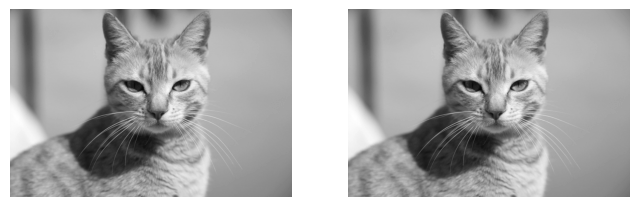

In [74]:
mycat = cv.imread(f'{faces_path}/mycat.jpg')
mycat = cv.cvtColor(mycat, cv.COLOR_BGR2GRAY)
mycat_img = np.copy(mycat)

roi_wajah = cascade_wajah.detectMultiScale(mycat_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(mycat_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(mycat,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mycat_img,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-0.5, 725.5, 479.5, -0.5))

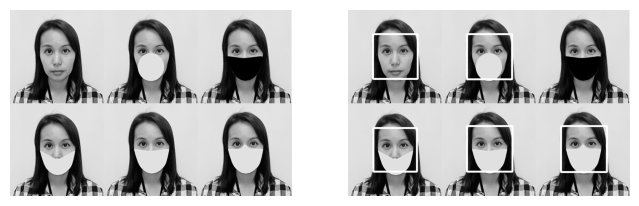

In [75]:
mask = cv.imread(f'{faces_path}/mask.png',0)
mask_img = np.copy(mask)

roi_wajah = cascade_wajah.detectMultiScale(mask_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(mask_img,(x,y),(x+w,y+h),(255,255,255),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(mask,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mask_img,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-0.5, 397.5, 567.5, -0.5))

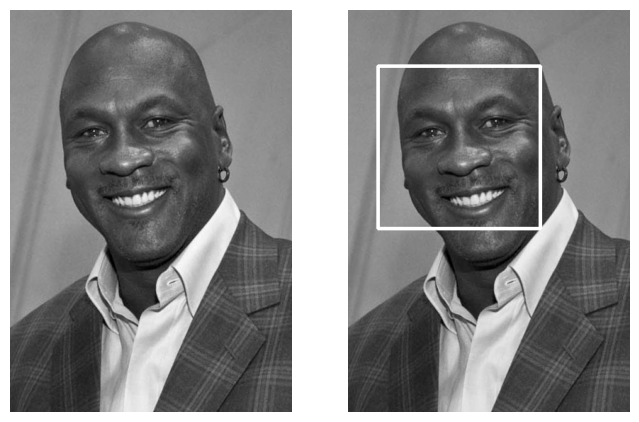

In [76]:
mjordan = cv.imread(f'{faces_path}/mjordan.jpg',0)
mjordan_img = np.copy(mjordan)

roi_wajah = cascade_wajah.detectMultiScale(mjordan_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(mjordan_img,(x,y),(x+w,y+h),(255,255,255),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(mjordan,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mjordan_img,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-0.5, 1049.5, 759.5, -0.5))

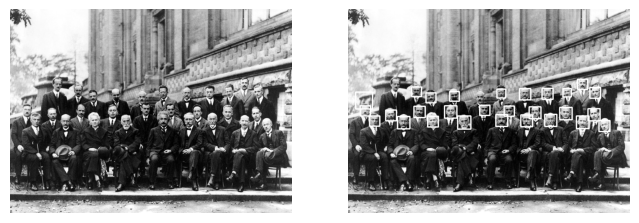

In [77]:
solvayconf = cv.imread(f'{faces_path}/solvayconf.jpg',0)
solvayconf_img = np.copy(solvayconf)

roi_wajah = cascade_wajah.detectMultiScale(solvayconf_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(solvayconf_img,(x,y),(x+w,y+h),(255,255,255),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(solvayconf,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(solvayconf_img,cmap='gray'),plt.axis('off')

3. **Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.**

(<Axes: >,
 (-0.5, 599.5, 399.5, -0.5))

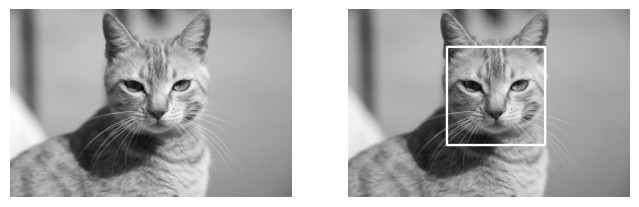

In [78]:
mycat = cv.imread(f'{faces_path}/mycat.jpg')
mycat_gray = cv.cvtColor(mycat, cv.COLOR_BGR2GRAY)

# Mencari file XML Cascade Classifier yang sesuai dengan deteksi wajah kucing
# Misalnya, kita menggunakan haarcascade_frontalcatface.xml (jika tersedia)
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')

mycat_img = np.copy(mycat_gray)
roi_kucing = cascade_kucing.detectMultiScale(mycat_img)
for (x, y, w, h) in roi_kucing:
    cv.rectangle(mycat_img, (x, y), (x+w, y+h), (255, 255, 0), 3)

plt.figure(figsize = (8,8))
plt.subplot(121), plt.imshow(mycat_gray, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(mycat_img, cmap='gray'), plt.axis('off')

**4. Cobakan juga untuk eyes detection.**

(<Axes: >,
 (-0.5, 872.5, 1049.5, -0.5))

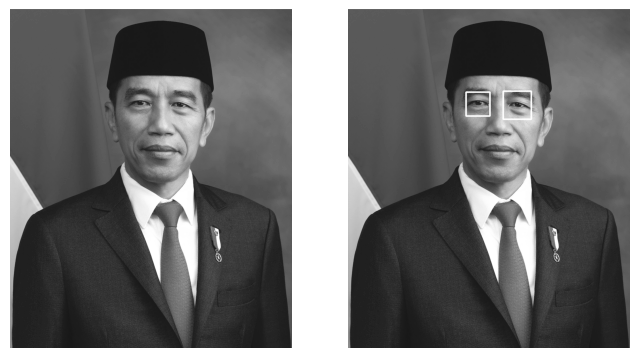

In [71]:
cascade_mata = cv.CascadeClassifier(f'{faces_path}/haarcascade_eye.xml')
jokowi_eyes = np.copy(presiden)

roi_mata = cascade_mata.detectMultiScale(jokowi_eyes)
for (x,y,w,h) in roi_mata:
  cv.rectangle(jokowi_eyes,(x,y),(x+w,y+h),(255,255,0),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(presiden,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(jokowi_eyes,cmap='gray'),plt.axis('off')

**5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60**

In [79]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [80]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [81]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [82]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


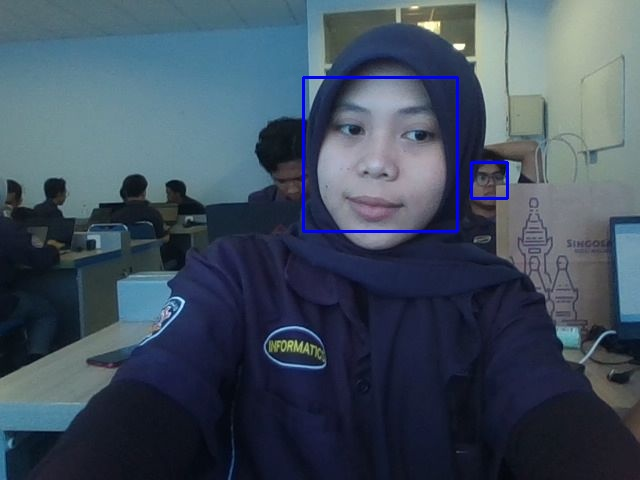

In [99]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**6. Lakukan Blurring pada bagian wajah yang terdeteksi. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring**

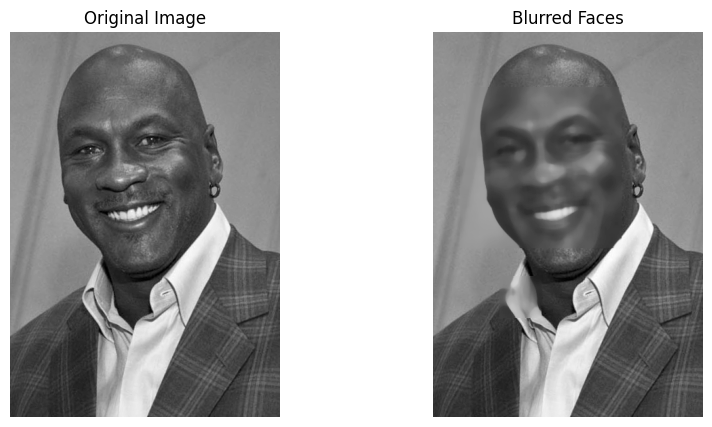

In [97]:
# Load the pre-trained Haar Cascade for face detection
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to apply median blur to faces in an image
def apply_median_blur_to_faces(image_path):
    # Read the image
    image = cv.imread(image_path)

    # Convert the image to grayscale for face detection
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Apply median blur only to the detected face regions
    for (x, y, w, h) in faces:
        face_roi = image[y:y+h, x:x+w]
        blurred_face = cv.medianBlur(face_roi, 13)
        image[y:y+h, x:x+w] = blurred_face

    return image

# Path to the image
image_path = f'{faces_path}/mjordan.jpg'

# Apply median blur to faces in the image
result_image = apply_median_blur_to_faces(image_path)

# Display the original and modified images using matplotlib.pyplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image in grayscale
original_image_gray = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2GRAY)
axes[0].imshow(original_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Blurred Faces
result_image_gray = cv.cvtColor(result_image, cv.COLOR_BGR2GRAY)
axes[1].imshow(result_image_gray, cmap='gray')
axes[1].set_title('Blurred Faces')
axes[1].axis('off')

plt.show()

**7. Lakukan segmentasi karakter pada KTP.**

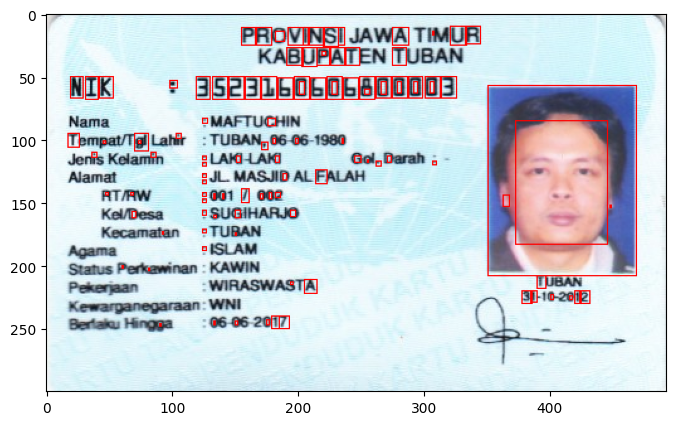

In [104]:
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp3.png')

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(img_ktp, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil
plt.figure(figsize=(8, 5))
plt.imshow(cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB))

**8. Lakukan cropping pada bagian NIK saja.**

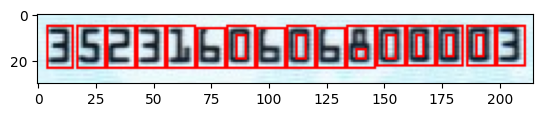

In [172]:
ktp_img = cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB)
ktp_crop = ktp_img[45:75, 115:330]
plt.imshow(ktp_crop, cmap='gray')
plt.show()

**9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter. Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.**

In [166]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

Penjelasan kode di atas adalah sebagai berikut ini
a. Import terlebih dahulu beberapa yang paket-paket yang dibutuhkan, ada beberapa paket yang baru misalkan tqdm digunakan untuk meload data diikuti dengan progress bar, numpy merupakan sebuah paket yang digunakan untuk melakukan operasi-operasi matriks atau array serta pickle adalah depedensi untuk menyimpan file untuk model data training.

b. Looping data training yang kelak digunakan untuk melabeli hasil pengenalan. Looping semua file training untuk diubah ke dalam sebuah image array.

c. Variabel X dan variabel Y digunakan untuk menyimpan label dan feature, label berisi karakter A-Z dan 0-9 sedangkan feture berisi data image array masing-masing label tersebut.

d. Terakhir tulis isi variabel X dan variabel Y ke dalam sebuah file pickle. File pickle tersebut nanti akan diload ketika proses training data.

**10. Training Data**

In [167]:
# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 5s 45ms/step - loss: 5.6366 - accuracy: 0.2030
Epoch 2/20
32/32 [==============================] - 1s 36ms/step - loss: 1.5012 - accuracy: 0.5200
Epoch 3/20
32/32 [==============================] - 1s 27ms/step - loss: 0.9473 - accuracy: 0.7150
Epoch 4/20
32/32 [==============================] - 1s 27ms/step - loss: 0.6979 - accuracy: 0.7760
Epoch 5/20
32/32 [==============================] - 1s 27ms/step - loss: 0.5291 - accuracy: 0.8470
Epoch 6/20
32/32 [==============================] - 1s 27ms/step - loss: 0.4045 - accuracy: 0.8750
Epoch 7/20
32/32 [==============================] - 1s 27ms/step - loss: 0.3207 - accuracy: 0.9020
Epoch 8/20
32/32 [==============================] - 1s 27ms/step - loss: 0.2577 - accuracy: 0.9220
Epoch 9/20
32/32 [==============================] - 1s 27ms/step - loss: 0.2053 - accuracy: 0.9370
Epoch 10/20
32/32 [==============================] - 1s 27ms/step - loss: 0.1541 - accuracy: 0.9590
Epoch 11/

**11. Testing Data**

In [168]:
# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 3s 44ms/step - loss: 6.3680 - accuracy: 0.2320
Epoch 2/20
32/32 [==============================] - 1s 43ms/step - loss: 1.5752 - accuracy: 0.5350
Epoch 3/20
32/32 [==============================] - 1s 27ms/step - loss: 0.9672 - accuracy: 0.7020
Epoch 4/20
32/32 [==============================] - 1s 27ms/step - loss: 0.6608 - accuracy: 0.7900
Epoch 5/20
32/32 [==============================] - 1s 27ms/step - loss: 0.4728 - accuracy: 0.8640
Epoch 6/20
32/32 [==============================] - 1s 27ms/step - loss: 0.3327 - accuracy: 0.9100
Epoch 7/20
32/32 [==============================] - 1s 27ms/step - loss: 0.2345 - accuracy: 0.9330
Epoch 8/20
32/32 [==============================] - 1s 27ms/step - loss: 0.1731 - accuracy: 0.9550
Epoch 9/20
32/32 [==============================] - 1s 27ms/step - loss: 0.1228 - accuracy: 0.9720
Epoch 10/20
32/32 [==============================] - 1s 27ms/step - loss: 0.0928 - accuracy: 0.9820
Epoch 11/

32/32 [==============================] - 0s 9ms/step - loss: 2.2584 - accuracy: 0.9800
Accuracy on the test set: 98.00%


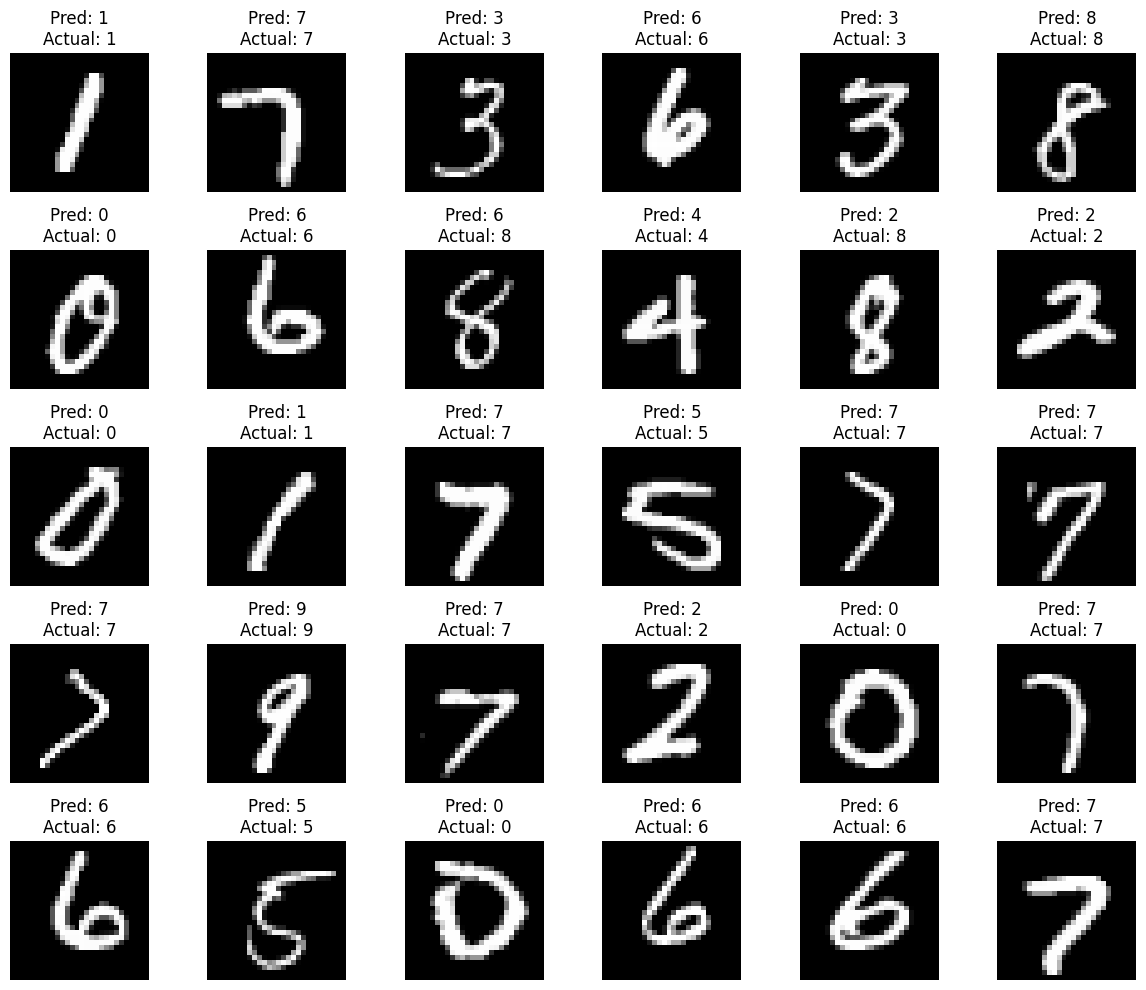

In [169]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

import matplotlib.pyplot as plt

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Assuming the images are 100x100 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()